In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My Drive/BIO/dataset

/content/drive/My Drive/BIO/dataset


In [3]:
import os
import pandas as pd

In [4]:
df = pd.read_csv("Datasettotal.csv")
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],direccion
0,00000013_024.png,Mass,24,13,57,M,AP,2500,2048,0.168,0.168,images_001/images/00000013_024.png
1,00000248_013.png,Mass,13,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_013.png
2,00000248_015.png,Mass,15,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_015.png
3,00000248_016.png,Mass,16,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_016.png
4,00000248_018.png,Mass,18,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_018.png
...,...,...,...,...,...,...,...,...,...,...,...,...
5702,00030484_003.png,No Finding,3,30484,46,F,AP,3056,2544,0.139,0.139,images_012/images/00030484_003.png
5703,00030519_007.png,No Finding,7,30519,50,M,AP,3056,2544,0.139,0.139,images_012/images/00030519_007.png
5704,00030559_000.png,No Finding,0,30559,75,F,AP,3056,2544,0.139,0.139,images_012/images/00030559_000.png
5705,00030573_016.png,No Finding,16,30573,26,M,AP,3056,2544,0.139,0.139,images_012/images/00030573_016.png


In [ ]:
df = pd.read_csv("Datasettotal.csv")
df_v2 = df[df['Finding Labels']!="No Finding"]
df_v1 = df[df['Finding Labels']=="No Finding"][::4]
df_vfinal = pd.concat([df_v2, df_v1])
df_vfinal.to_csv("Data_v2.csv", index=False, sep=';')

In [6]:
df_v2 = df[df['Finding Labels']!="No Finding"]
df_v2

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],direccion
0,00000013_024.png,Mass,24,13,57,M,AP,2500,2048,0.168,0.168,images_001/images/00000013_024.png
1,00000248_013.png,Mass,13,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_013.png
2,00000248_015.png,Mass,15,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_015.png
3,00000248_016.png,Mass,16,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_016.png
4,00000248_018.png,Mass,18,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_018.png
...,...,...,...,...,...,...,...,...,...,...,...,...
3602,00030389_002.png,Emphysema,2,30389,30,F,AP,3056,2544,0.139,0.139,images_012/images/00030389_002.png
3603,00030459_001.png,Emphysema,1,30459,67,M,AP,3056,2544,0.139,0.139,images_012/images/00030459_001.png
3604,00030459_002.png,Emphysema,2,30459,67,M,AP,3056,2544,0.139,0.139,images_012/images/00030459_002.png
3605,00030459_003.png,Emphysema,3,30459,67,M,AP,3056,2544,0.139,0.139,images_012/images/00030459_003.png


In [15]:
df_v1 = df[df['Finding Labels']=="No Finding"][::4]
df_v1

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],direccion
3607,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168,images_001/images/00000005_001.png
3611,00000090_001.png,No Finding,1,90,68,F,AP,2500,2048,0.168,0.168,images_001/images/00000090_001.png
3615,00000181_049.png,No Finding,49,181,50,F,AP,2500,2048,0.168,0.168,images_001/images/00000181_049.png
3619,00000246_004.png,No Finding,4,246,51,M,AP,3056,2544,0.139,0.139,images_001/images/00000246_004.png
3623,00000332_001.png,No Finding,1,332,54,F,AP,2500,2048,0.168,0.168,images_001/images/00000332_001.png
...,...,...,...,...,...,...,...,...,...,...,...,...
5687,00030162_021.png,No Finding,21,30162,15,M,AP,3056,2544,0.139,0.139,images_012/images/00030162_021.png
5691,00030245_000.png,No Finding,0,30245,33,F,AP,3056,2544,0.139,0.139,images_012/images/00030245_000.png
5695,00030320_003.png,No Finding,3,30320,6,F,AP,2544,3056,0.139,0.139,images_012/images/00030320_003.png
5699,00030375_006.png,No Finding,6,30375,64,M,AP,3056,2544,0.139,0.139,images_012/images/00030375_006.png


In [17]:
df_vfinal = pd.concat([df_v2, df_v1])
df_vfinal.to_csv("Data_v2.csv", index=False, sep=';')

In [ ]:
L = []
for i in df['Finding Labels']:
    if i not in L:
        L.append(i)

In [ ]:
df2 = df[df['Finding Labels']==L[0]]
df3 = df[df['Finding Labels']==L[1]]
df4 = df[df['Finding Labels']==L[2]]
df5 = df[df['Finding Labels']==L[3]]
df6 = df[df['Finding Labels']==L[4]]
df7 = df[df['Finding Labels']==L[5]]
df8 = df[df['Finding Labels']==L[6]]

In [ ]:
df['direccion'][df['direccion']=='images_004/images/00006596_006.png']

138    images_004/images/00006596_006.png
Name: direccion, dtype: object

In [ ]:
dftrain = pd.read_csv("dataTrain.csv", sep=';')
dftest = pd.read_csv("dataTest.csv", sep=';')

In [ ]:
dftrain.to_csv("dataTrain.csv", sep=';', index=False)

In [ ]:
#dftrain['Finding Labels']

In [ ]:
#dftrain['Image Index']

In [ ]:
nuevaDir = []
for i in range(len(dftrain['Finding Labels'])):
    fold = "train/{}/{}".format(dftrain['Finding Labels'][i], dftrain['Image Index'][i])
    nuevaDir.append(fold)
dftrain['Direccion Train'] = nuevaDir

In [ ]:
nuevaDir = []
for i in range(len(dftest['Finding Labels'])):
    fold = "test/{}/{}".format(dftest['Finding Labels'][i], dftest['Image Index'][i])
    nuevaDir.append(fold)
dftest['Direccion Test'] = nuevaDir

In [ ]:
#del dftest['Direccion Train']

In [ ]:
dftest.to_csv("dataTest.csv", sep=';', index=False)

In [ ]:
dftrain.shape[0] + dftest.shape[0]

5707

In [ ]:
L

['Mass',
 'Nodule',
 'Consolidation',
 'Edema',
 'Pneumonia',
 'Emphysema',
 'No Finding']

In [ ]:
import os
from PIL import Image

set_train = []
set_test = []

for enfermedad in L:
    folder = enfermedad + "_2500_2048"
    #os.makedirs(folder, exist_ok = True) 
    dfx = df[df['Finding Labels']==enfermedad]
    direcciones =  dfx['direccion']
    for direccion in direcciones:
        nombre_imagen = direccion.split("/")[-1]
        img = Image.open(direccion)
        redim = img.resize((2500, 2048))
        nueva_direccion = folder + "/" + nombre_imagen
        redim = redim.save(nueva_direccion)

In [ ]:
ok.mkdir("train")
os.mkdir("test")

In [ ]:
len(os.listdir("train"))

7

In [ ]:
len(os.listdir("test"))

7

In [ ]:
for enfermedad in L:
    folder = enfermedad + "_2500_2048"
    os.makedirs(folder, exist_ok = True) 
    dfx = df[df['Finding Labels']==enfermedad]
    direcciones =  dfx['direccion']
    limite = (len(direcciones)*3)//4
    for i in range(limite):
        nombre_imagen = direcciones[i].split("/")[-1]
        img = Image.open(direcciones[i])
        redim = img.resize((2500, 2048))
        nueva_direccion = folder + "/" + nombre_imagen
        redim = redim.save(nueva_direccion)

In [21]:
df = pd.read_csv("Data_v2.csv", sep=';')
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],direccion
0,00000013_024.png,Mass,24,13,57,M,AP,2500,2048,0.168,0.168,images_001/images/00000013_024.png
1,00000248_013.png,Mass,13,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_013.png
2,00000248_015.png,Mass,15,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_015.png
3,00000248_016.png,Mass,16,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_016.png
4,00000248_018.png,Mass,18,248,87,M,AP,2500,2048,0.168,0.168,images_001/images/00000248_018.png
...,...,...,...,...,...,...,...,...,...,...,...,...
4127,00030162_021.png,No Finding,21,30162,15,M,AP,3056,2544,0.139,0.139,images_012/images/00030162_021.png
4128,00030245_000.png,No Finding,0,30245,33,F,AP,3056,2544,0.139,0.139,images_012/images/00030245_000.png
4129,00030320_003.png,No Finding,3,30320,6,F,AP,2544,3056,0.139,0.139,images_012/images/00030320_003.png
4130,00030375_006.png,No Finding,6,30375,64,M,AP,3056,2544,0.139,0.139,images_012/images/00030375_006.png


In [ ]:
import shutil
#shutil.rmtree("revisar.txt")
#os.remove("revisar.txt")

In [ ]:
250*1.10

275.0

In [ ]:
200*1.10

220.00000000000003

In [20]:
from PIL import Image
import os
import pandas as pd

df = pd.read_csv("Data_v2.csv", sep=';')
#df

def crear_carpetas(dataFrame):

    #os.makedirs('train', exist_ok = True) 
    #os.makedirs('test', exist_ok = True) 

    garb = open("revisar_224_224.txt", "w")

    L = []
    for i in dataFrame['Finding Labels']:
        if i not in L:
            L.append(i)

    set_train = []
    set_test = []
    set_valid = []

    for enfermedad in L:
        folderTrain ='train_v224/' + enfermedad + "_224_224"
        folderTest = 'test_v224/' + enfermedad + "_224_224"
        folderValid = 'valid_v224/' + enfermedad + "_224_224"
        os.makedirs(folderTrain, exist_ok = True) 
        os.makedirs(folderTest, exist_ok = True) 
        os.makedirs(folderValid, exist_ok = True) 
        dfx = dataFrame[dataFrame['Finding Labels']==enfermedad]
        n = (3*len(dfx.index))//4
        m = (9*len(dfx.index))//10

        indices_train = list(dfx.index[:n])
        indices_test = list(dfx.index[n:m])
        indices_valid = list(dfx.index[m:])

        dataTrain = dfx.loc[indices_train]
        dataTest = dfx.loc[indices_test]
        dataValid = dfx.loc[indices_valid]

        set_train.append(dataTrain)
        set_test.append(dataTest)
        set_valid.append(dataValid)

        for direccion in dataTrain['direccion']:
            nombre_imagen = direccion.split("/")[-1]
            nueva_direccion = folderTrain + "/" + nombre_imagen
            try:
                img = Image.open(direccion)
                redim = img.resize((224, 224))
                redim = redim.save(nueva_direccion)
            except OSError:
                garb.write("{}|{}\n".format(direccion, nueva_direccion))


        for direccion in dataTest['direccion']:
            nombre_imagen = direccion.split("/")[-1]
            nueva_direccion = folderTest + "/" + nombre_imagen
            try:
                img = Image.open(direccion)
                redim = img.resize((224, 224))
                redim = redim.save(nueva_direccion)
            except OSError:
                garb.write("{}|{}\n".format(direccion, nueva_direccion))
        
        for direccion in dataValid['direccion']:
            nombre_imagen = direccion.split("/")[-1]
            nueva_direccion = folderValid + "/" + nombre_imagen
            try:
                img = Image.open(direccion)
                redim = img.resize((224, 224))
                redim = redim.save(nueva_direccion)
            except OSError:
                garb.write("{}|{}\n".format(direccion, nueva_direccion))
    garb.close()
    dfTrain = pd.concat(set_train).to_csv("dataTrain_224_224.csv", sep=';', index=False)
    dfTest = pd.concat(set_test).to_csv("dataTest_224_224.csv", sep=';', index=False)
    dfValid = pd.concat(set_test).to_csv("dataValid_224_224.csv", sep=';', index=False)

crear_carpetas(df)

In [ ]:
from glob import glob

In [ ]:
import os

In [ ]:
c = 0
for i in os.listdir("train_v224/"):
    print(i)
    print(len(os.listdir("train_v224/"+i)))
    c+=len(os.listdir("train_v224/"+i))
    print()
c

Mass_224_224
579

Nodule_224_224
585

Consolidation_224_224
723

Edema_224_224
432

Pneumonia_224_224
109

Emphysema_224_224
275

No Finding_224_224
1575



4278

In [ ]:
from glob import glob
len(glob("train_v2/*/*"))

4278

In [ ]:
len(glob("test_v2/*/*"))

855

In [ ]:
len(glob("valid_v2/*/*"))

574

In [ ]:
d = 0
for i in os.listdir("test_v2/"):
    print(i)
    print(len(os.listdir("test_v2/"+i)))
    d+=len(os.listdir("test_v2/"+i))
    print()
d

Mass_250_200
115

Nodule_250_200
117

Consolidation_250_200
144

Edema_250_200
87

Pneumonia_250_200
22

Emphysema_250_200
55

No Finding_250_200
315



855

In [ ]:
e = 0
for i in os.listdir("valid_v2/"):
    print(i)
    print(len(os.listdir("valid_v2/"+i)))
    e+=len(os.listdir("valid_v2/"+i))
    print()
e

Mass_250_200
78

Nodule_250_200
79

Consolidation_250_200
97

Edema_250_200
58

Pneumonia_250_200
15

Emphysema_250_200
37

No Finding_250_200
210



574

(1024, 1024)


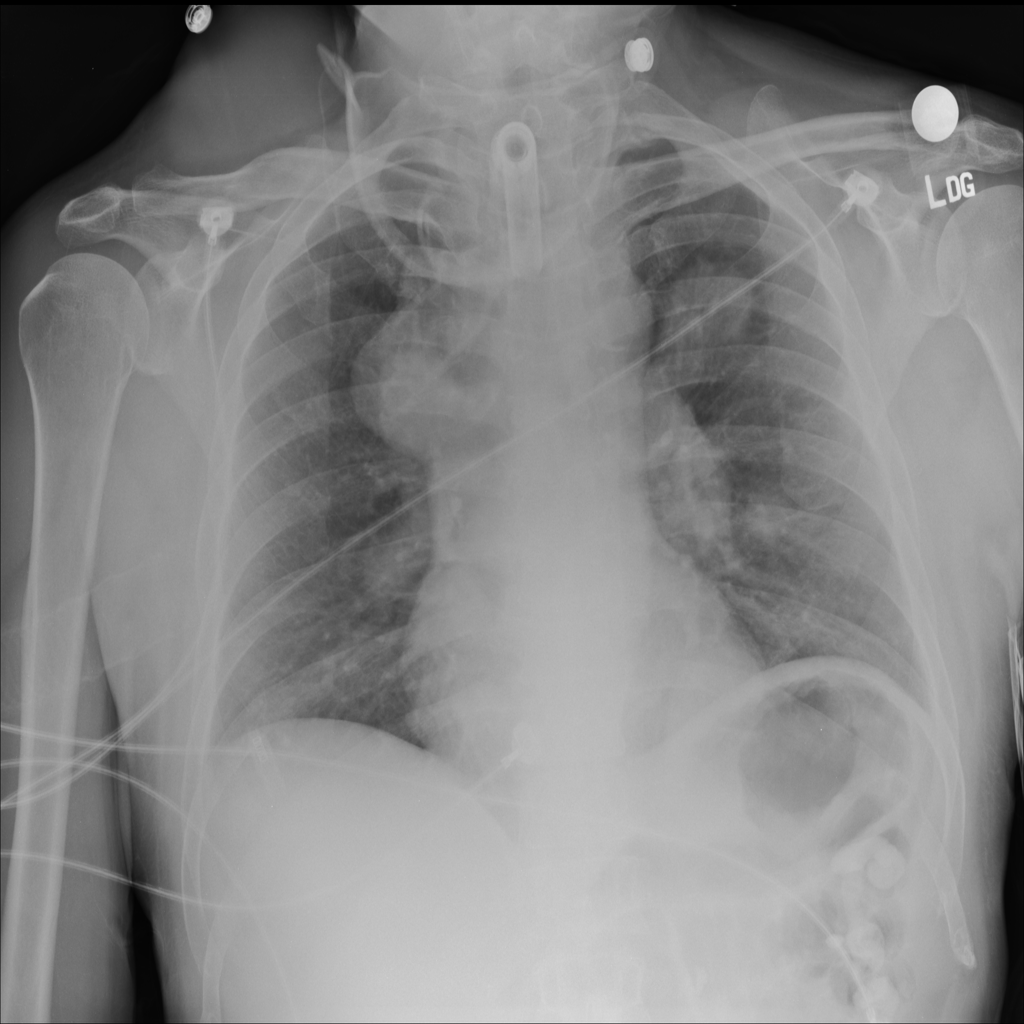

In [ ]:
imgg = Image.open('images_004/images/00006596_006.png')
print(imgg.size)
imgg

In [ ]:
import os
from PIL import Image
folder = L[0]+"_2500_2048"
os.mkdir(folder)
direcciones = df2['direccion']
for direccion in direcciones:
    nombre_imagen = direccion.split("/")[-1]
    img = Image.open(direccion)
    redim = img.resize((2500, 2048))
    nueva_direccion = folder + "/" + nombre_imagen
    redim = redim.save(nueva_direccion)

SyntaxError: ignored

In [ ]:
%mkdir valid

In [ ]:
len(os.listdir("test"))

7

In [ ]:
lista = os.listdir("test")
lista

['Mass_2500_2048',
 'Nodule_2500_2048',
 'Consolidation_2500_2048',
 'Edema_2500_2048',
 'Pneumonia_2500_2048',
 'Emphysema_2500_2048',
 'No Finding_2500_2048']

In [ ]:
"""
for enf in lista:
    carpeta = "valid/" + enf
    os.mkdir(carpeta)
    print(carpeta)
    dir_ = "test/" + enf
    listax = os.listdir(dir_)
    cantidad = len(listax)
    subcantidad = int(cantidad*.4)
    print(cantidad, subcantidad)
    for imagen in listax[:subcantidad]:
        dir2 = dir_ + "/" + imagen
        dir3 = "valid/" + "/".join(dir2.split("/")[1:])
        shutil.move(dir2, dir3)
"""

valid/Mass_2500_2048
193 77
valid/Nodule_2500_2048
196 78
valid/Consolidation_2500_2048
241 96
valid/Edema_2500_2048
145 58
valid/Pneumonia_2500_2048
37 14
valid/Emphysema_2500_2048
92 36
valid/No Finding_2500_2048
525 210
